In [1]:
import pandas as pd
import gzip
import json


import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [2]:
# import datasets

In [3]:
# train dataset
train_tweets = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
test_tweets = pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")

In [4]:
# Inspect train data
train_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [5]:
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
# Fill nan values with 'unknown'
train_tweets['Location'].fillna('Unknown', inplace = True)

In [7]:
# Exploratory Data Analysis

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


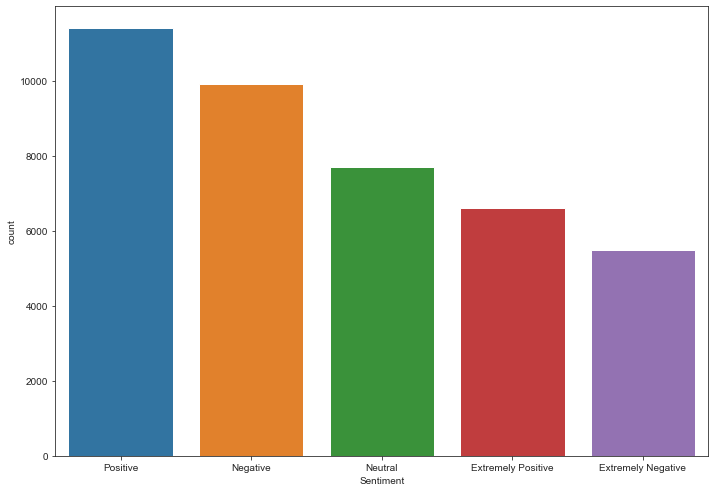

In [8]:
# Plot sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(train_tweets['Sentiment'], order=train_tweets['Sentiment'].value_counts(ascending=False).index, ax=ax)
plt.show()

In [9]:
# Check percentage of each rating
sentiments_count_props = train_tweets['Sentiment'].value_counts(normalize = True)
sentiments_count_props

Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: Sentiment, dtype: float64

In [10]:
# Positive Sentiments makes up about 27% of tweets in the dataset while Extremely Negative Tweets are the least.

In [11]:
tweet_locations = train_tweets['Location'].value_counts(ascending=False)
tweet_locations.head(10)

Unknown            8593
London             540 
United States      528 
London, England    520 
New York, NY       395 
Washington, DC     373 
United Kingdom     337 
Los Angeles, CA    281 
India              268 
UK                 232 
Name: Location, dtype: int64

In [12]:
# Select data for Machine Learning
# Select Original Tweet and Sentiment columns

In [13]:
ml_data = train_tweets[['OriginalTweet', 'Sentiment']]
ml_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [14]:
# rename columns to class and text
df = ml_data.rename(columns = {'OriginalTweet': 'text', 'Sentiment': 'class'})
df.head()

,text,class
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [15]:
# Text Processing with NLKT

In [16]:
# import libraries
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

import pickle


In [17]:
# remove punctuation
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned_text'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x)\
                                                                  .split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenpk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df.head(10)

,text,class,cleaned_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,menyrbi phil gahan chrisitv http co ifz fan pa http co xx ghgfzcc http co i nlzdxno
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak http co binca vp p
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,my food stock one empti pleas panic there will be enough food for everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener http co zrlg z j
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,me readi go supermarket covid outbreak not i paranoid food stock litterali empti the coronaviru seriou thing pleas panic it caus shortag coronavirusfr restezchezv stayathom confin http co usmualq n
5,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive,as news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report http co cfxch lu
6,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive,cashier groceri store share insight covid to prove credibl comment i civic class i know i talk http co iefdnehgdo
7,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral,wa supermarket today didn buy toilet paper rebel toiletpapercrisi covid http co evxkqlidaz
8,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive,due covid retail store classroom atlanta open walk busi class next two week begin monday march we continu process onlin phone order normal thank understand http co kw zj o
9,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative,for corona prevent stop buy thing cash use onlin payment method corona spread note also prefer onlin shop home it time fight covid govindia indiafightscorona


In [25]:
# create features and label data
X_train = df['cleaned_text']
y_train = df['class']

In [26]:
# Vectorize all features to input in model cross validation using max_features = 100
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
# final_features = vectorizer.fit_transform(df['cleaned_text']).toarray()
# labels = df['class']
# final_features.shape, labels.shape

In [27]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [28]:
# Main Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                    ('clf',  RandomForestClassifier())])

In [30]:
# Function to clean text

def clean_text(text):
    cleaned = text.apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x)\
                                                                  .split() if i not in words]).lower())
    return cleaned
    

In [33]:
X_test = clean_text(test_tweets['OriginalTweet'])
y_test = test_tweets['Sentiment']

In [46]:
# fitting our model and save it in a pickle for later use

model = pipeline.fit_transform(X_train, y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'

In [ ]:
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

In [45]:
#ytest = np.array(y_test)
model.predict(["Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i	"])

array(['Positive'], dtype=object)

In [34]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

                    precision    recall  f1-score   support

Extremely Negative       0.57      0.35      0.43       592
Extremely Positive       0.61      0.42      0.49       599
          Negative       0.43      0.43      0.43      1041
           Neutral       0.46      0.68      0.55       619
          Positive       0.43      0.49      0.45       947

          accuracy                           0.47      3798
         macro avg       0.50      0.47      0.47      3798
      weighted avg       0.49      0.47      0.47      3798

[[206  15 249  59  63]
 [ 13 250  59  40 237]
 [103  34 447 213 244]
 [  7  18  93 419  82]
 [ 32  95 181 176 463]]


In [38]:
# MultiNomial Naive Bayes

nb_pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                    ('clf',  MultinomialNB())])

In [39]:
nb_model = pipeline.fit(X_train, y_train)

In [40]:
print(classification_report(y_test, nb_model.predict(X_test)))
print(confusion_matrix(y_test, nb_model.predict(X_test)))

                    precision    recall  f1-score   support

Extremely Negative       0.57      0.35      0.43       592
Extremely Positive       0.61      0.43      0.50       599
          Negative       0.45      0.45      0.45      1041
           Neutral       0.46      0.67      0.55       619
          Positive       0.43      0.49      0.46       947

          accuracy                           0.48      3798
         macro avg       0.50      0.48      0.48      3798
      weighted avg       0.49      0.48      0.47      3798

[[209  15 258  54  56]
 [  9 255  47  42 246]
 [105  36 470 215 215]
 [ 12  14  84 415  94]
 [ 34  97 178 177 461]]
